In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# way to model and .csv
new_path = '/Users/vladkozlovskiy/Desktop/DATAS/_Architecture_CV/_Mos_arch_final_sept/'
csv_path = new_path + 'csv_path_11_classes_sept.csv'

model_path = '/Users/vladkozlovskiy/Desktop/DATAS/_Architecture_CV/_Mos_arch_final_sept/model_final_sept'
reloaded = tf.keras.models.load_model(model_path)
reloaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 320)     4160      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 320)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 320)     409920    
                                                                 
 dropout (Dropout)           (None, 126, 126, 320)     0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 320)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 320)       4

In [3]:
a = reloaded.get_layer('dense_2')
print(a)
b = reloaded.layers[-2]
print(b)

In [4]:
# removing the classification layer
feature_extractor = tf.keras.Model(inputs=reloaded.input, outputs=reloaded.layers[-2].output)

In [6]:
# Passing images through the model
# Define image data generator with preprocessing (grayscale as in model) and data augmentation

train_datagen = ImageDataGenerator(preprocessing_function=tf.image.rgb_to_grayscale,
#train_datagen = ImageDataGenerator(validation_split = 0.2,                                   
    rotation_range=0.1,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=[0.7, 1.2],
    rescale=1./255, fill_mode='nearest')


image_generator = train_datagen.flow_from_directory(
    directory='/Users/vladkozlovskiy/Desktop/DATAS/_Architecture_CV/Mos_Arch_11_sept',
    target_size=(256, 256),  
    batch_size=32,
    class_mode=None,  
    shuffle=False)  

Found 3167 images belonging to 11 classes.


In [7]:
class_names = list(image_generator.class_indices.keys())
class_names

['01_Modern',
 '02_Palaty',
 '03_Brutalism',
 '04_Constructivism',
 '05_Empire',
 '06_Industrial_XIX',
 '07_Panelka',
 '08_XXI',
 '09_Classic',
 '10_Church',
 '11_Fortification']

In [8]:
# Passing the image generator through the model to extract features
features = feature_extractor.predict(image_generator)

99/99 [==============================] - 231s 2s/step


In [11]:
# import labels from .csv
target_col = pd.read_csv(csv_path)
target = target_col['target_col']
target = np.array(target)

# Hierarchical Clustering Dendrogram of all images

In [12]:
# Calculate pairwise distances
pairwise_distances = squareform(pdist(features, metric='euclidean'))

# Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward').fit(pairwise_distances)

/Users/vladkozlovskiy/anaconda3/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


/var/folders/4c/hjs_wdj51j582vlxww6jc4fr0000gn/T/ipykernel_3813/2795308765.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(pairwise_distances, method='ward'))


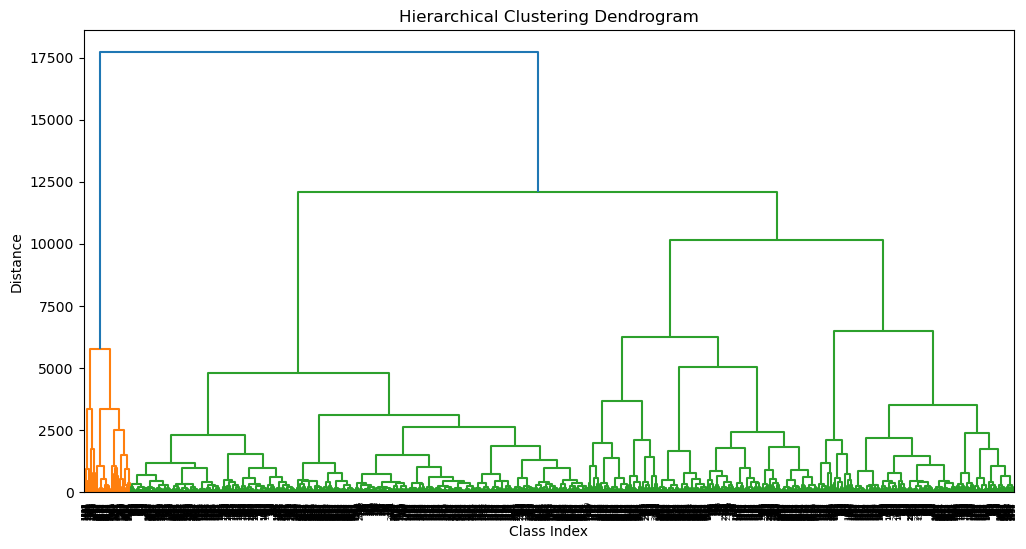

In [13]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Class Index')
plt.ylabel('Distance')
dendrogram = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(pairwise_distances, method='ward'))
plt.show()

/var/folders/4c/hjs_wdj51j582vlxww6jc4fr0000gn/T/ipykernel_3813/2378713111.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(pairwise_distances, method='ward'), labels=target)


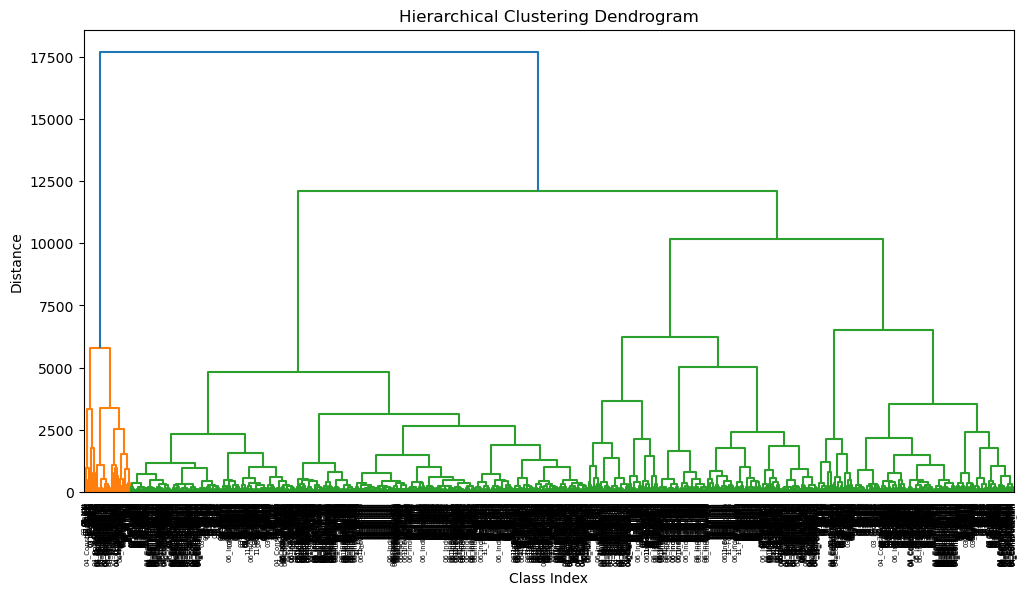

In [14]:
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Class Index')
plt.ylabel('Distance')
dendrogram = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(pairwise_distances, method='ward'), labels=target)
plt.show()

# Few ordinations

In [15]:
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial import distance
from scipy.cluster import hierarchy
from sklearn import metrics
from sklearn.manifold import MDS

from sklearn import manifold
from sklearn.manifold import TSNE
from sklearn import decomposition

from sklearn.preprocessing import StandardScaler


In [16]:
#matrix_euclid = sklearn.metrics.pairwise_distances(features, Y=None, metric='euclidean')

### MDS

In [17]:
# MDS by features with dissimilarity='euclidean'
embedding = MDS(n_components=2, dissimilarity='euclidean')
table_for_mds = embedding.fit_transform(features)
table_for_mds = pd.DataFrame(table_for_mds)
table_for_mds.columns = ['x', 'y']
table_for_mds['labels'] = target
table_for_mds

,x,y,labels
0,3.839680,7.171563,10_Church
1,-1.309076,3.899343,10_Church
2,-2.123787,5.813354,10_Church
3,0.266706,5.697241,10_Church
4,-3.875130,5.929457,10_Church
...,...,...,...
3162,27.069680,-17.244926,07_Panelka
3163,27.686706,-16.488434,07_Panelka
3164,16.648667,-14.022054,07_Panelka
3165,19.147957,-9.121920,07_Panelka


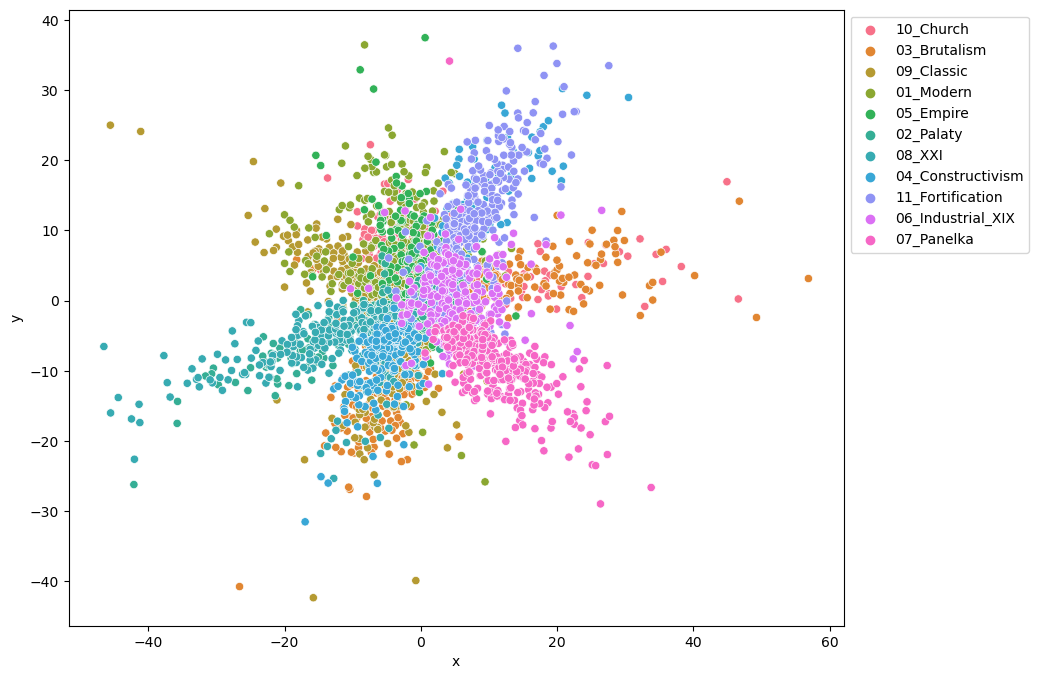

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = table_for_mds, x='x', y ='y', hue='labels')
plt.legend(bbox_to_anchor = (1,1), fontsize=10)

### TSNE

In [19]:
tsne_proc = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(features)
print(tsne_proc.shape)
ordination_tsne = pd.DataFrame(tsne_proc, columns=['x', 'y']) 
ordination_tsne['labels'] = target
ordination_tsne

(3167, 2)


,x,y,labels
0,39.333736,-41.496723,10_Church
1,36.796124,-49.819717,10_Church
2,24.394611,-41.616013,10_Church
3,38.368427,-63.272667,10_Church
4,38.561142,-47.025482,10_Church
...,...,...,...
3162,59.920013,78.398109,07_Panelka
3163,60.062107,75.504784,07_Panelka
3164,42.370300,71.534706,07_Panelka
3165,51.742710,63.505203,07_Panelka


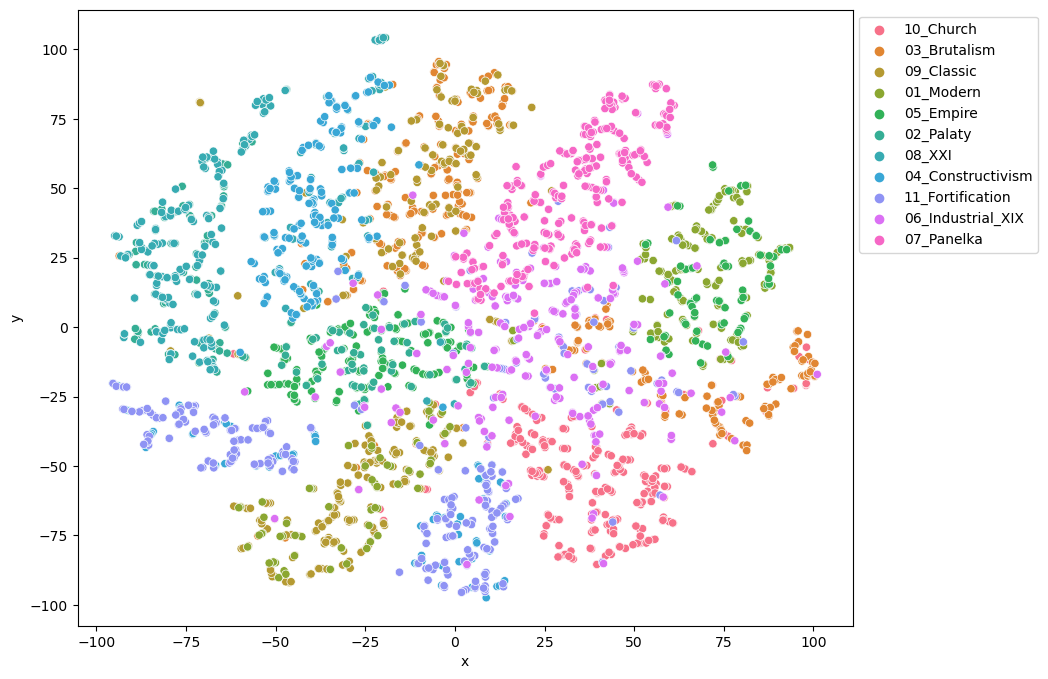

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = ordination_tsne, x='x', y ='y', hue='labels')
plt.legend(bbox_to_anchor = (1,1), fontsize=10)

### PCA

In [21]:
pca = decomposition.PCA(n_components=2)
pca_proc = pca.fit_transform(features)
print(pca_proc.shape)
ordination_pca = pd.DataFrame(pca_proc, columns=['x', 'y'])
ordination_pca['labels'] = target
ordination_pca

(3167, 2)


,x,y,labels
0,5.588882,-5.784077,10_Church
1,0.708391,-4.424836,10_Church
2,1.123277,-7.993119,10_Church
3,2.406196,-6.451777,10_Church
4,0.885248,-4.837007,10_Church
...,...,...,...
3162,10.313161,26.597361,07_Panelka
3163,10.897845,27.932142,07_Panelka
3164,4.243087,17.100569,07_Panelka
3165,8.693825,16.584906,07_Panelka


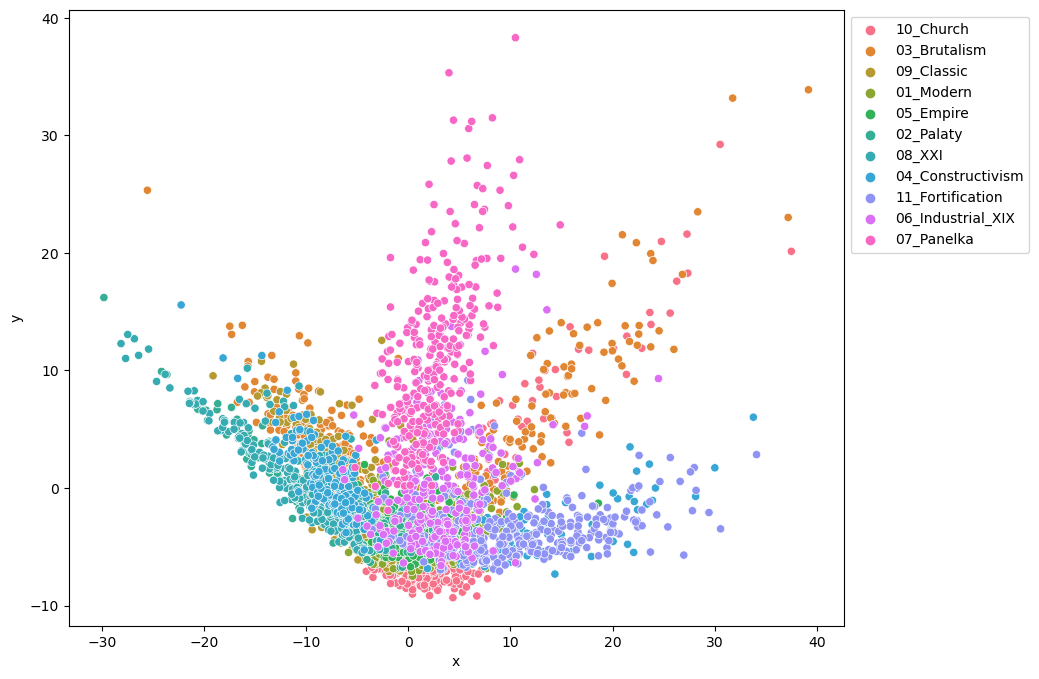

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = ordination_pca, x='x', y ='y', hue='labels')
plt.legend(bbox_to_anchor = (1,1), fontsize=10)

# Similarities betwen classes

In [23]:
features.shape

(3167, 320)

In [24]:
unique_classes = np.unique(target)

features_by_classes = pd.DataFrame()

for clas in unique_classes:
    clas_features = np.array([x for x, a in enumerate(target) if a == clas])
    class_data = features.T[:,clas_features].T
    group_features = np.mean(class_data, axis=0)
    features_by_classes[clas] = group_features
features_by_classes

,01_Modern,02_Palaty,03_Brutalism,04_Constructivism,05_Empire,06_Industrial_XIX,07_Panelka,08_XXI,09_Classic,10_Church,11_Fortification
0,0.034285,0.043228,0.226504,0.090383,0.066205,0.426678,1.525022,0.020967,0.029863,0.116429,0.090285
1,0.015747,0.060097,0.278826,0.270442,0.129200,0.292453,0.597427,0.000128,0.006128,0.157264,0.658098
2,1.226559,1.210855,0.539531,1.282819,0.866148,0.562413,0.332953,1.651630,0.348736,0.568177,1.469658
3,1.301508,0.649573,1.137442,1.113520,0.624113,0.788606,1.042175,0.879610,1.457730,0.881126,1.399251
4,1.705374,0.612745,0.442216,1.164012,1.301816,0.585291,0.040954,0.606596,1.052772,1.200662,1.662556
...,...,...,...,...,...,...,...,...,...,...,...
315,0.633160,0.361872,0.384116,0.722031,0.365620,0.430566,0.093341,0.441990,0.508373,0.858041,1.716582
316,0.759904,0.617362,0.239851,0.308339,0.377829,0.300100,0.429529,0.936994,0.188397,0.513271,0.100440
317,2.071135,2.906848,1.836739,2.054905,1.283898,0.789060,1.550260,4.248801,2.286312,0.874150,0.202020
318,1.321111,0.269945,0.982648,1.019132,0.982255,1.237654,1.642322,0.112664,0.056028,1.066748,2.422030


<Axes: >

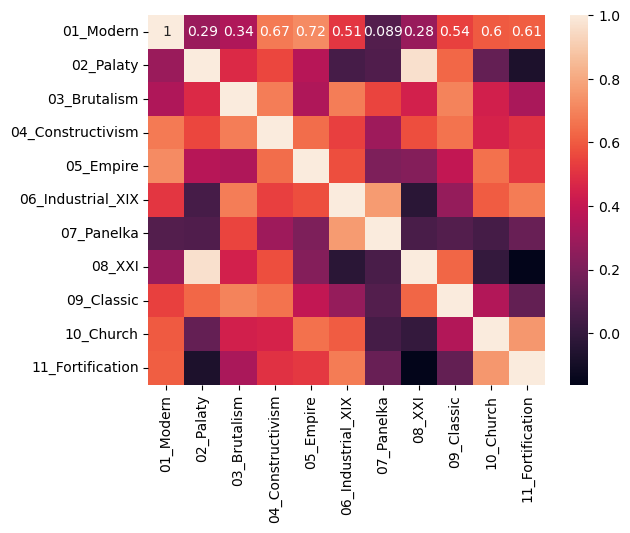

In [25]:
# draw heatmap
sns.heatmap(features_by_classes.corr(), annot=True)

In [26]:
scaler = StandardScaler()
scaler.fit(features_by_classes)
features_by_classes_trans = scaler.transform(features_by_classes)

In [27]:
features_by_classes.corr()

,01_Modern,02_Palaty,03_Brutalism,04_Constructivism,05_Empire,06_Industrial_XIX,07_Panelka,08_XXI,09_Classic,10_Church,11_Fortification
01_Modern,1.000000,0.285311,0.340568,0.674760,0.720171,0.513235,0.089063,0.281065,0.538956,0.598639,0.608170
02_Palaty,0.285311,1.000000,0.473894,0.554320,0.360736,0.054730,0.081809,0.966798,0.630445,0.138237,-0.071662
03_Brutalism,0.340568,0.473894,1.000000,0.685276,0.341505,0.684381,0.549573,0.442972,0.698562,0.440033,0.328023
04_Constructivism,0.674760,0.554320,0.685276,1.000000,0.641696,0.533467,0.293004,0.569623,0.656652,0.451933,0.497200
05_Empire,0.720171,0.360736,0.341505,0.641696,1.000000,0.572698,0.208012,0.226387,0.396067,0.651458,0.515664
06_Industrial_XIX,0.513235,0.054730,0.684381,0.533467,0.572698,1.000000,0.762901,-0.034088,0.272417,0.604933,0.680608
07_Panelka,0.089063,0.081809,0.549573,0.293004,0.208012,0.762901,1.000000,0.062160,0.088766,0.050514,0.148952
08_XXI,0.281065,0.966798,0.442972,0.569623,0.226387,-0.034088,0.062160,1.000000,0.625979,-0.000579,-0.161930
09_Classic,0.538956,0.630445,0.698562,0.656652,0.396067,0.272417,0.088766,0.625979,1.000000,0.350666,0.136543
10_Church,0.598639,0.138237,0.440033,0.451933,0.651458,0.604933,0.050514,-0.000579,0.350666,1.000000,0.753709


In [28]:
# similarity matrix with sklearn.metrics.pairwise_distances
matrix_pw_cousine = sklearn.metrics.pairwise_distances(features_by_classes_trans.T, Y=None, metric='cosine')
print(matrix_pw_cousine.shape)
print(matrix_pw_cousine)

(11, 11)
[[0.         0.7146894  0.6594322  0.32524043 0.27982908 0.48676538
  0.91093695 0.71893495 0.46104455 0.4013607  0.39183003]
 [0.7146894  0.         0.5261062  0.44567955 0.6392644  0.94526994
  0.91819143 0.03320152 0.36955488 0.8617627  1.0716623 ]
 [0.6594322  0.5261062  0.         0.3147235  0.65849483 0.31561917
  0.45042717 0.5570274  0.3014385  0.55996716 0.6719764 ]
 [0.32524043 0.44567955 0.3147235  0.         0.3583048  0.4665324
  0.7069963  0.43037695 0.3433482  0.54806733 0.50279987]
 [0.27982908 0.6392644  0.65849483 0.3583048  0.         0.42730278
  0.7919883  0.7736132  0.6039326  0.34854186 0.4843366 ]
 [0.48676538 0.94526994 0.31561917 0.4665324  0.42730278 0.
  0.23709834 1.0340875  0.7275827  0.39506668 0.31939185]
 [0.91093695 0.91819143 0.45042717 0.7069963  0.7919883  0.23709834
  0.         0.93783987 0.91123396 0.9494861  0.85104835]
 [0.71893495 0.03320152 0.5570274  0.43037695 0.7736132  1.0340875
  0.93783987 0.         0.37402046 1.0005791  1.161

In [29]:
# another version
from itertools import combinations

# Get unique class labels
unique_classes = np.unique(target)

# Initialize a similarity matrix
similarity_matrix = np.zeros((len(unique_classes), len(unique_classes)))

# Compute distance between each pair of classes
for i, class1 in enumerate(unique_classes):
    for j, class2 in enumerate(unique_classes):
        if i < j:

            # Extract features assigned to each class
            class1_features = np.array([x for x, a in enumerate(target) if a == class1])
            class2_features = np.array([x for x, a in enumerate(target) if a == class2])
            
            # Separate data into two classes
            class1_data = features.T[:,class1_features].T
            class2_data = features.T[:,class2_features].T

            class1_data = pd.DataFrame(class1_data)
            class2_data = pd.DataFrame(class2_data)
            
            # Compute mean and covariance matrix for each class
            group1_features = np.mean(class1_data, axis=0)
            group2_features = np.mean(class2_data, axis=0)


            # Compute distance between the two classes
            similarity = np.dot(group1_features, group2_features) / (np.linalg.norm(group1_features) * np.linalg.norm(group2_features))
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity


print("Similarity Matrix:")
print(similarity_matrix.shape)
print(similarity_matrix)

Similarity Matrix:
(11, 11)
[[0.         0.66851795 0.73008847 0.86906135 0.88656723 0.80156451
  0.54746133 0.63057381 0.78905833 0.82755262 0.8012175 ]
 [0.66851795 0.         0.76705581 0.80546182 0.72442526 0.58892661
  0.5217818  0.97874177 0.82145488 0.60561383 0.4413875 ]
 [0.73008847 0.76705581 0.         0.8846876  0.75808704 0.88106757
  0.77944803 0.72058839 0.86696255 0.77450359 0.67756599]
 [0.86906135 0.80546182 0.8846876  0.         0.87371373 0.83084226
  0.66922528 0.78127766 0.85144025 0.78609848 0.75834846]
 [0.88656723 0.72442526 0.75808704 0.87371373 0.         0.84431726
  0.63084525 0.62626404 0.74411798 0.86253309 0.76612163]
 [0.80156451 0.58892661 0.88106757 0.83084226 0.84431726 0.
  0.87673676 0.50038612 0.68752825 0.84160459 0.83900493]
 [0.54746133 0.5217818  0.77944803 0.66922528 0.63084525 0.87673676
  0.         0.47246212 0.53075588 0.53380466 0.53130293]
 [0.63057381 0.97874177 0.72058839 0.78127766 0.62626404 0.50038612
  0.47246212 0.         0.7994

/var/folders/4c/hjs_wdj51j582vlxww6jc4fr0000gn/T/ipykernel_3813/909179970.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(matrix_pw_cousine, method="ward")


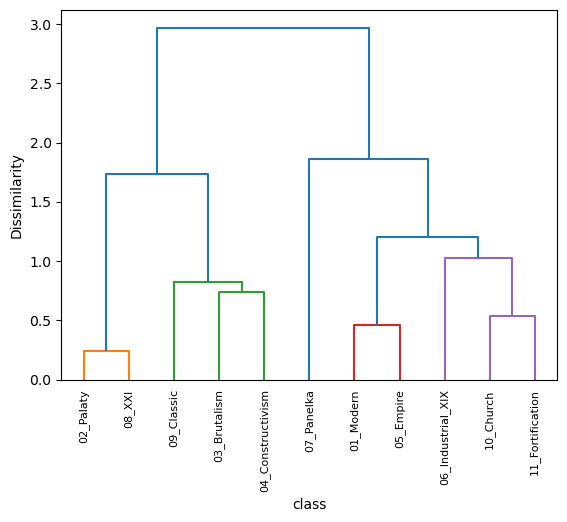

In [30]:
linkage = hierarchy.linkage(matrix_pw_cousine, method="ward")
#threshold = 1
#clusters = hierarchy.fcluster(linkage, threshold, criterion="distance")
#hierarchy.dendrogram(linkage, color_threshold=1)

hierarchy.dendrogram(linkage, labels=unique_classes, color_threshold=1.2, truncate_mode='lastp', leaf_rotation=90.)
plt.xlabel("class")
plt.ylabel("Dissimilarity")
plt.tick_params(axis='x', labelsize=8)
plt.show()

/var/folders/4c/hjs_wdj51j582vlxww6jc4fr0000gn/T/ipykernel_3813/3974554422.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dendrogram = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(matrix_pw_cousine, method='ward'), labels=unique_classes, color_threshold=1.7)


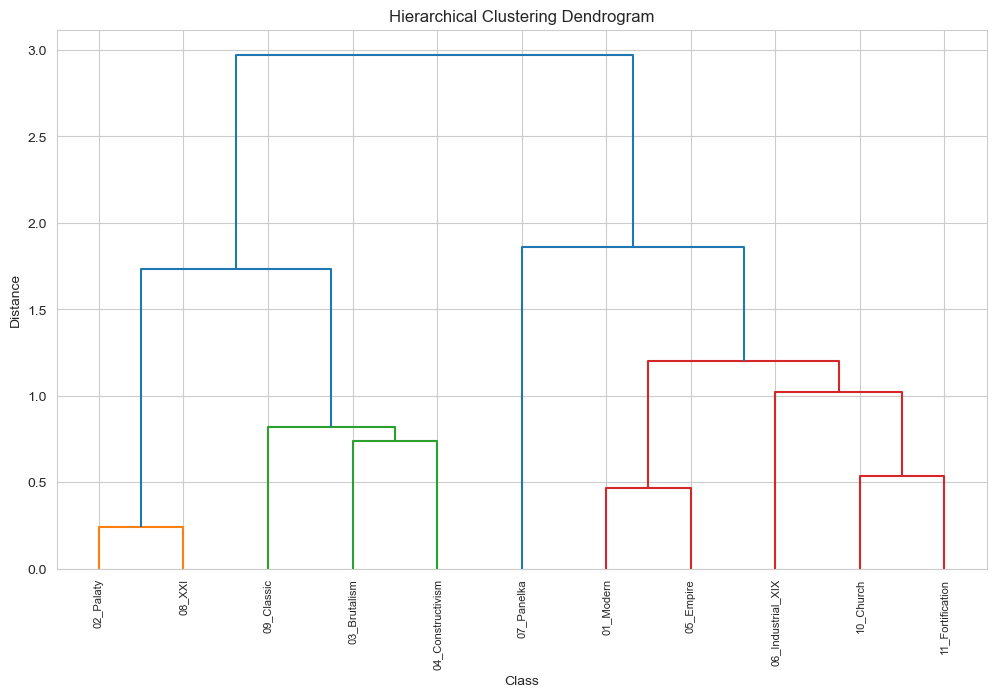

In [31]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
#clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward').fit(matrix_pw_cousine)
dendrogram = scipy.cluster.hierarchy.dendrogram(scipy.cluster.hierarchy.linkage(matrix_pw_cousine, method='ward'), labels=unique_classes, color_threshold=1.7)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Class', fontsize=10)
plt.ylabel('Distance', fontsize=10)
plt.tick_params(axis='x', labelsize=8, rotation=90)
plt.show()
